<a href="https://colab.research.google.com/github/SuneelPasupuleti/Credit-Scoring-Model-for-Loan-Approval-/blob/main/Credit_Scroing_Model_for_Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Scoring Model for Loan Approval** 🏦

## **Step 1:** **Set Up Google Colab Environment**

1.   Open Google Colab (https://colab.research.google.com/).
2.   Create a new Notebook.
3.   Enable GPU (Optional):

        Click Runtime → Change runtime type → Set hardware accelerator to GPU (if needed for XGBoost).



## **Step 2: Install Required Libraries**

In [2]:
!pip install imbalanced-learn xgboost gradio joblib

**Import necessary Libraries**

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import gradio as gr
import joblib

## **Step 3: Upload & Load Dataset**


1.   Upload the dataset manually:

    Click on the folder icon in the left sidebar.

    Click Upload Files and select credit_scoring_dataset.csv.

2.   Load the dataset in Pandas.



In [4]:
file_path = "credit_scoring_dataset.csv"
df = pd.read_csv(file_path)

In [5]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_taken_year,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,2006,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,2019,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,2014,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,2010,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,2007,Rejected


In [6]:
df.tail(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_taken_year,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,2023,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,2019,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,2017,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,2010,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,2014,Approved


### **Exploratory Data Analysis**

In [7]:
print("Shape:\n",df.shape)

print("Column Names:\n", df.columns )

df.info()

print("Summary:\n",df.describe())


Shape:
 (4269, 14)
Column Names:
 Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', 'loan_taken_year',
       ' loan_status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-n

In [8]:
df.columns = df.columns.str.replace(" ", "", regex=True)

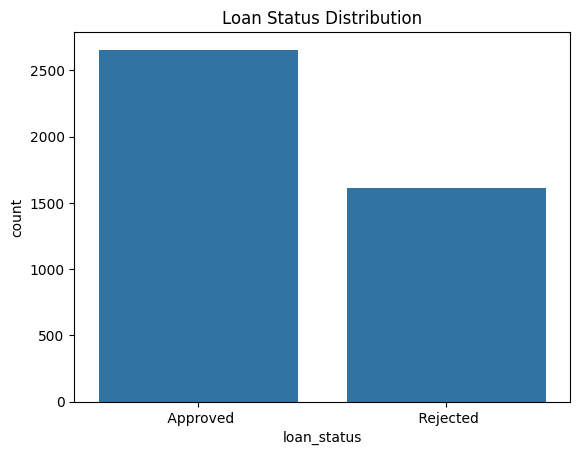

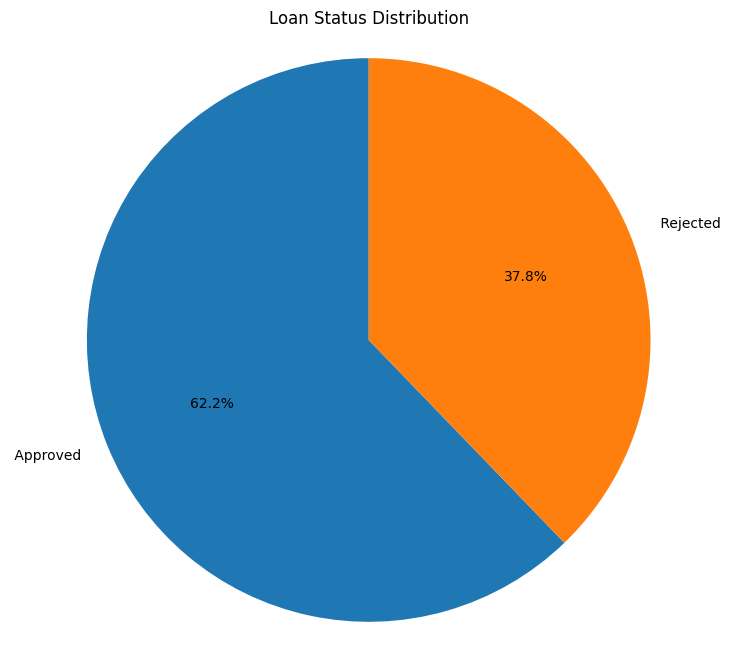

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of loan_status
sns.countplot(x=df['loan_status'])
plt.title("Loan Status Distribution")
plt.show()

loan_status_counts = df['loan_status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



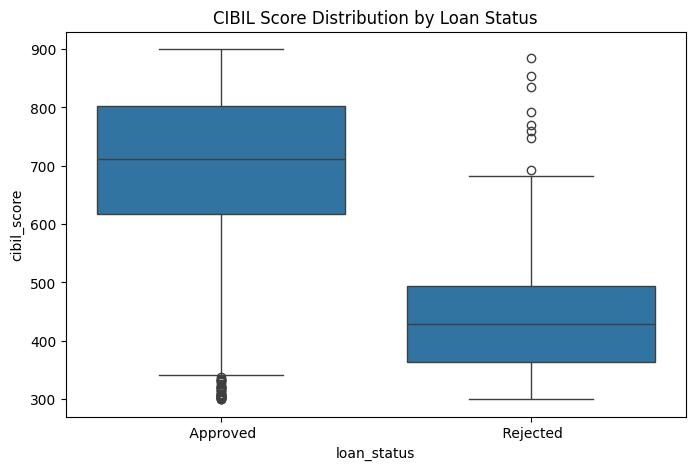

In [10]:
#Box Plot (Loan Status vs. Features)

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['loan_status'], y=df['cibil_score'])
plt.title("CIBIL Score Distribution by Loan Status")
plt.show()


## **Step 4: Data Preprocessing**

*   Remove spaces from column names

*   Handle missing values


*   Encode categorical features

*   Select important features





In [11]:
# Remove spaces in column names
df.columns = df.columns.str.replace(" ", "", regex=True)

# Handling Missing Values
df.dropna(inplace=True)

# Feature Encoding (Categorical to Numerical)
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Selecting top 5 features
selected_features = ["income_annum", "loan_amount", "loan_term", "cibil_score", "education"]
X = df[selected_features]
y = df['loan_status']

**After Feature Encoding**

In [12]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_taken_year,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,2006,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,2019,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,2014,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,2010,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,2007,1


## **Step 5: Feature Scaling & Balancing Data**

1.   Apply Standardization
2.   Handle Imbalanced Data using SMOTE



In [13]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Class Balancing using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [14]:
joblib.dump(scaler, 'scaler.pkl')

from google.colab import files
files.download('scaler.pkl')

print("Scaler Successfully Downloaded!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Scaler Successfully Downloaded!


## **Step 6: Train-Test Split**

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Downloading train &  test sets**

In [16]:
from google.colab import files
# Creating DataFrames for train and test sets
train_df = pd.DataFrame(X_train, columns=selected_features)
train_df['loan_status'] = y_train

test_df = pd.DataFrame(X_test, columns=selected_features)
test_df['loan_status'] = y_test

# Saving DataFrames to CSV files
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

# Downloading the CSV files
files.download('train_data.csv')
files.download('test_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Step 7: Train Machine Learning Models**


*   Define models
*   Train models & Evaluate



In [17]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred)
    }


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:50:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## **Step 8: Model Evaluation & Validation**

*   Model Evaluation
*   Overfitting Check



In [18]:
# Model Evaluation
for model_name, metrics in results.items():
    print(f"\n{model_name} Model Evaluation:")
    for metric, score in metrics.items():
        print(f"{metric}: {score:.4f}")

# Overfitting Check
for name, model in models.items():
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"\n{name} Overfitting Check:")
    print(f"Train Score: {train_score:.4f}")
    print(f"Test Score: {test_score:.4f}")


Random Forest Model Evaluation:
Accuracy: 0.9868
Precision: 0.9928
Recall: 0.9822
F1 Score: 0.9875
AUC-ROC: 0.9871

Logistic Regression Model Evaluation:
Accuracy: 0.9219
Precision: 0.9268
Recall: 0.9251
F1 Score: 0.9260
AUC-ROC: 0.9217

XGBoost Model Evaluation:
Accuracy: 0.9812
Precision: 0.9874
Recall: 0.9768
F1 Score: 0.9821
AUC-ROC: 0.9814

Random Forest Overfitting Check:
Train Score: 1.0000
Test Score: 0.9868

Logistic Regression Overfitting Check:
Train Score: 0.9275
Test Score: 0.9219

XGBoost Overfitting Check:
Train Score: 1.0000
Test Score: 0.9812


**Apply Overfitting Handling Techniques**

In [19]:
# Apply Overfitting Handling Techniques
optimized_models = {
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features="sqrt", random_state=42),
    "Logistic Regression": LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=1000),
    "XGBoost": XGBClassifier(learning_rate=0.01, max_depth=6, n_estimators=100, reg_lambda=1, reg_alpha=0.5, subsample=0.8, colsample_bytree=0.8, eval_metric='logloss')
}

# Train and evaluate after handling overfitting
print("\nAfter Handling Overfitting:")
for name, model in optimized_models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{name} - Train Score: {train_score:.4f}, Test Score: {test_score:.4f}")


After Handling Overfitting:
Random Forest - Train Score: 0.9934, Test Score: 0.9831
Logistic Regression - Train Score: 0.9294, Test Score: 0.9229
XGBoost - Train Score: 0.9779, Test Score: 0.9755


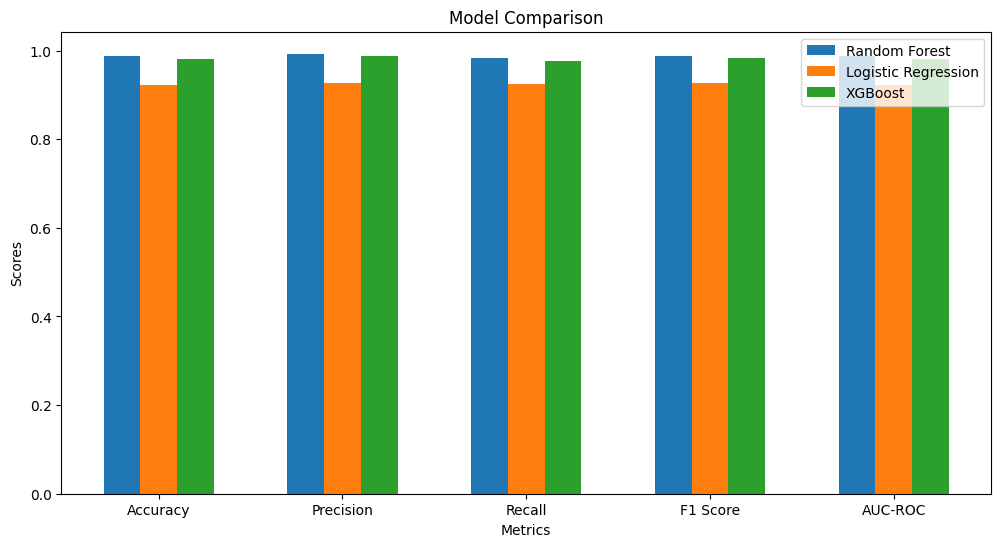

In [20]:
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'Logistic Regression', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

scores = {
    'Random Forest': [0.9868, 0.9928, 0.9822, 0.9875, 0.9871],
    'Logistic Regression': [0.9219, 0.9268, 0.9251, 0.9260, 0.9217],
    'XGBoost': [0.9812, 0.9874, 0.9768, 0.9821, 0.9814]
}

x = range(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

for i, model_name in enumerate(model_names):
    ax.bar([xi + i * width for xi in x], scores[model_name], width, label=model_name)

ax.set_xticks([xi + width for xi in x])
ax.set_xticklabels(metrics)
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.legend()
plt.show()


### **Evaluation Metrics**

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


for name, model in models.items():
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"\n{name} Model Evaluation:")
    print(f"R^2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")


Random Forest Model Evaluation:
R^2 Score: 0.9472
RMSE: 0.1148
MSE: 0.0132
MAE: 0.0132

Logistic Regression Model Evaluation:
R^2 Score: 0.6867
RMSE: 0.2794
MSE: 0.0781
MAE: 0.0781

XGBoost Model Evaluation:
R^2 Score: 0.9245
RMSE: 0.1372
MSE: 0.0188
MAE: 0.0188


## **Step 9: Find the Best Model**

In [22]:
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model = models[best_model_name]

print(f"Best model: {best_model_name}")

Best model: Random Forest


## **Step 10: Save the Best Model**

In [23]:
import joblib

model_filename = f"{best_model_name.replace(' ', '_').lower()}_model.pkl"
joblib.dump(best_model, model_filename)

print(f"Best model saved as {model_filename}")

Best model saved as random_forest_model.pkl


### **Feature Importance**

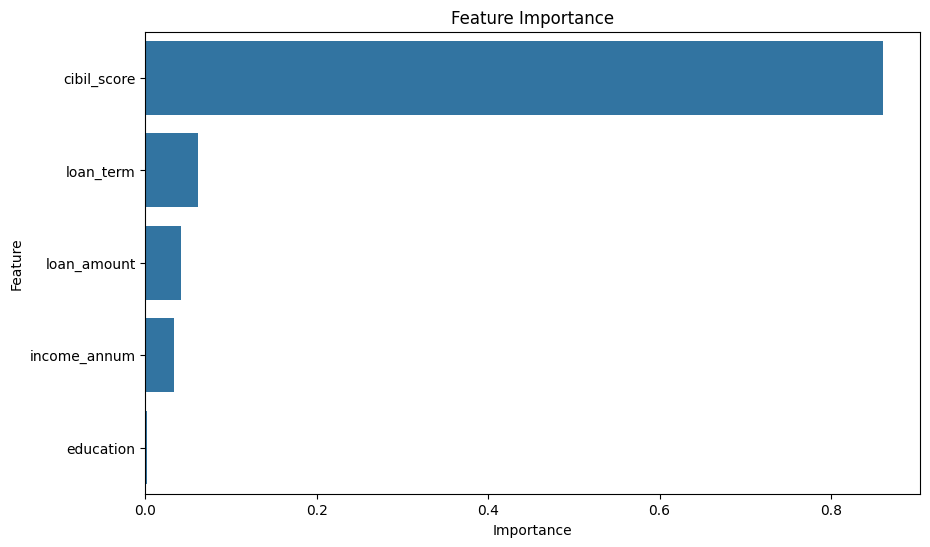

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'best_model' is the trained model
feature_importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


### **Correlation Matrix**

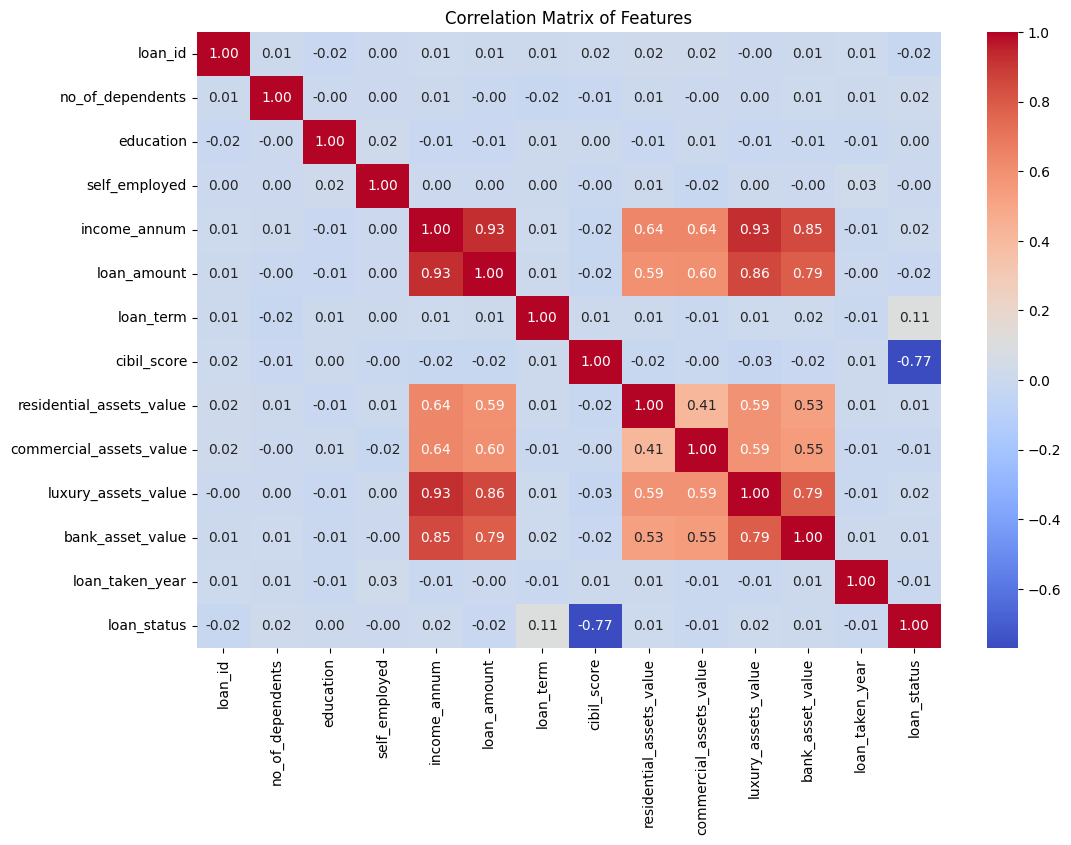

In [25]:
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

### **Confusion Matrix**

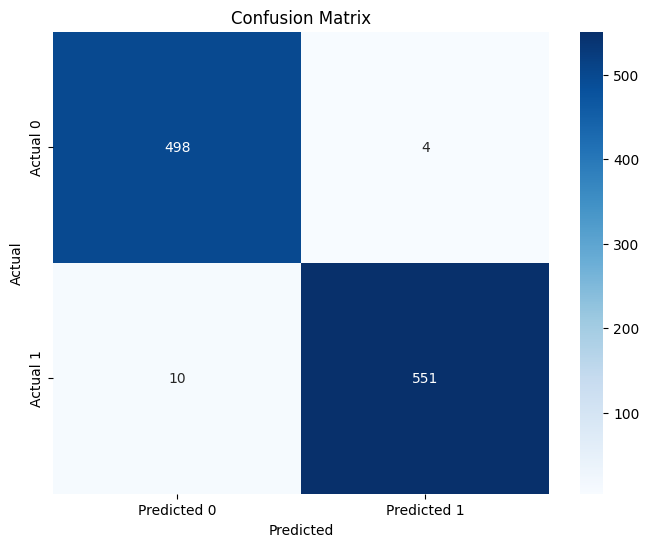

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'best_model' and 'X_test', 'y_test' are defined from the previous code
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Step 11: Deploy Model Using Gradio**

In [27]:
def predict_loan_approval(income_annum, loan_amount, loan_term, cibil_score, education):
    input_data = np.array([income_annum, loan_amount, loan_term, cibil_score, education]).reshape(1, -1)
    input_scaled = scaler.transform(input_data)
    prediction = best_model.predict(input_scaled)
    probabilities = best_model.predict_proba(input_scaled)[0]  # [Rejected, Approved] probabilities

    loan_status = "Approved ✅" if prediction[0] == 0 else "Rejected ❎"
    approval_prob = probabilities[0]
    rejection_prob = probabilities[1]

    if prediction[0] == 0:
        remarks = "Successfully your Loan is Approved ✔️"
    else:
        remarks_list = []
        if income_annum < 500000:
            remarks_list.append("Annual Income is Low")
        if loan_amount > 100000000:
            remarks_list.append("Loan Amount High")
        if loan_term < 2:
            remarks_list.append("Loan Term should be High")
        if cibil_score < 549:
            remarks_list.append("Cibil Score is Low")
        remarks = "Reasons for Loan Rejection: " + ", ".join(remarks_list)

    return loan_status, approval_prob, rejection_prob, remarks

iface = gr.Interface(
    fn=predict_loan_approval,
    inputs=[
        gr.Number(label="Annual Income"),
        gr.Number(label="Loan Amount"),
        gr.Number(label="Loan Term (Years)"),
        gr.Number(label="CIBIL Score"),
        gr.Radio(choices=[0 , 1], label="Education Level (0: Graduate, 1: Not Graduate)")
    ],
    outputs=[
        gr.Textbox(label="Loan Status"),
        gr.Number(label="Approval Probability"),
        gr.Number(label="Rejection Probability"),
        gr.Textbox(label="Remarks")
    ],
    title="Loan Approval Prediction",
    description=f"Using {best_model_name} for Real-Time Scoring")

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fc6ed3bf9e1fab0cd6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### **Animated Gradio Interface**

In [28]:
import numpy as np
import gradio as gr

def predict_loan_approval(income_annum, loan_amount, loan_term, cibil_score, education):
    input_data = np.array([income_annum, loan_amount, loan_term, cibil_score, education]).reshape(1, -1)
    input_scaled = scaler.transform(input_data)
    prediction = best_model.predict(input_scaled)
    probabilities = best_model.predict_proba(input_scaled)[0]  # [Rejected, Approved] probabilities

    loan_status = "Approved ✅" if prediction[0] == 0 else "Rejected ❌"
    approval_prob = probabilities[0]
    rejection_prob = probabilities[1]

    if prediction[0] == 0:
        remarks = "Successfully your Loan is Approved ✔️"
    else:
        remarks_list = []
        if income_annum < 500000:
            remarks_list.append("Annual Income is Low ❌")
        if loan_amount > 100000000:
            remarks_list.append("Loan Amount High ❌")
        if loan_term < 2:
            remarks_list.append("Loan Term should be High ❌")
        if cibil_score < 549:
            remarks_list.append("Cibil Score is Low ❌")
        remarks = "Reasons for Loan Rejection: " + ", ".join(remarks_list)

    return loan_status, approval_prob, rejection_prob, remarks

with gr.Blocks(title="Loan Approval System", css="""
    .gradio-container {
        background: linear-gradient(45deg, #ff7eb3, #ff758c, #ff7eb3, #c3a7ff, #8aa9ff, #6dc6ff);
        background-size: 300% 300%;
        animation: gradientBG 6s ease infinite;
        border: 2px solid white;
    }
    @keyframes gradientBG {
        0% { background-position: 0% 50%; }
        50% { background-position: 100% 50%; }
        100% { background-position: 0% 50%; }
    }

    .gr-box {
        background: white;
        border-radius: 14px;
        padding: 15px;
        box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.2);
    }

    .gr-box1 {
        background: linear-gradient(45deg, #ffcc80, #ffb74d);
        color: white;
        font-weight: bold;
        border: none;
        padding: 12px;
        border-radius: 8px;
        cursor: pointer;
        transition: 0.3s ease-in-out;
    }
    .gr-box1:hover {
        background: linear-gradient(45deg, #ffa726, #ff9800);
        box-shadow: 0px 4px 10px rgba(255, 152, 0, 0.5);
    }

    /* Ensure input fields remain white */
    input, select, textarea, input[type="radio"] {
        background-color: white !important;
    }

    .gr-input, .gr-textbox, .gr-radio, .gr-number, input, textarea, select {
        background: rgba(255, 255, 255, 0.1) !important;
        color: black !important;
        border-radius: 6px;
        border: 2px solid orange !important;
        padding: 10px;
    }

    /* Make sure the outer radio button stays white */
    input[type="radio"] {
        background-color: white !important;
        border: 2px solid orange !important;
        appearance: none;
        width: 24px;
        height: 24px;
        border-radius: 50%;
        display: inline-block;
        position: relative;
        cursor: pointer;
    }

    /* Style for the selected radio button (inner circle grey) */
    input[type="radio"]:checked::before {
        content: "";
        width: 12px;
        height: 12px;
        background-color: orange;
        border-radius: 50%;
        position: absolute;
        top: 50%;
        left: 50%;
        transform: translate(-50%, -50%);
    }

""") as demo:

    gr.Markdown("""
      <h1 style='
        font-family: Poppins, sans-serif;
        font-weight: bold;
        color: orange;
        text-shadow: 1px 1px 1px white,
                    -1px -1px 1px white,
                    1px -1px 1px white,
                    -1px 1px 1px white;'>
        Loan Approval Prediction
      </h1>
    """)

    gr.Markdown(f"Using **{best_model_name}** for Real-Time Scoring")

    with gr.Row():
        income = gr.Number(label="Annual Income", elem_classes=["gr-box"])
        loan_amount = gr.Number(label="Loan Amount", elem_classes=["gr-box"])
        loan_term = gr.Number(label="Loan Term (Years)", elem_classes=["gr-box"])

    with gr.Row():
        cibil_score = gr.Number(label="CIBIL Score", elem_classes=["gr-box"])
        education = gr.Radio(choices=[0 , 1], label="Education Level (0: Graduate, 1: Not Graduate)", elem_classes=["gr-box"])

    submit = gr.Button("Predict", elem_classes=["gr-box1"])

    loan_status = gr.Textbox(label="Loan Status", elem_classes=["gr-box"])
    approval_prob = gr.Number(label="Approval Probability", elem_classes=["gr-box"])
    rejection_prob = gr.Number(label="Rejection Probability", elem_classes=["gr-box"])
    remarks = gr.Textbox(label="Remarks", elem_classes=["gr-box"])

    submit.click(
        predict_loan_approval,
        inputs=[income, loan_amount, loan_term, cibil_score, education],
        outputs=[loan_status, approval_prob, rejection_prob, remarks]
    )

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e77570e2d471487510.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## **Step 12: Run the Model**
      Execute the final Gradio UI, and it will generate predictions!

## **Step 13: Save & Download Model for Future Use**

In [29]:
from google.colab import files
files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Project Summary**

### **Project Title:** Credit Scoring Model for Loan Approval 🏦

**Description:**
This project aims to build an accurate and efficient credit scoring model to predict loan approval using machine learning techniques.
The dataset consists of various financial and demographic attributes of applicants, including income, loan amount, loan term,
CIBIL score, and education level.

**Methodology:**
1. Data Preprocessing: Handled missing values, categorical encoding, feature scaling, and class balancing using SMOTE.
2. Model Training: Implemented three machine learning models - Random Forest, Logistic Regression, and XGBoost.
3. Evaluation: Compared model performance using accuracy, precision, recall, F1 score, and AUC-ROC.
4. Deployment: Integrated the best-performing model into a Gradio-based web interface for real-time loan approval prediction.

**Best Model Selected:** {best_model_name}

**Deployment:**
The project is deployed using Gradio, allowing users to input financial details and receive loan approval status along with probability scores.


# **Thank You! ♥**